In [71]:
# Reading the dataset
#reading data in panda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from wordcloud import WordCloud
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
df=pd.read_csv(r"C:\Users\hp\OneDrive - subho\Desktop\UNIFIED\Laptop Price Analysis _ ML _ FA _ DA Project\laptop_prices.csv")
print(df)
type(df)

     Company                              Product            TypeName  Inches  \
0      Apple                          MacBook Pro           Ultrabook    13.3   
1      Apple                          Macbook Air           Ultrabook    13.3   
2         HP                               250 G6            Notebook    15.6   
3      Apple                          MacBook Pro           Ultrabook    15.4   
4      Apple                          MacBook Pro           Ultrabook    13.3   
...      ...                                  ...                 ...     ...   
1270  Lenovo                       Yoga 500-14ISK  2 in 1 Convertible    14.0   
1271  Lenovo                       Yoga 900-13ISK  2 in 1 Convertible    13.3   
1272  Lenovo                   IdeaPad 100S-14IBR            Notebook    14.0   
1273      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook    15.6   
1274    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook    15.6   

      Ram          OS  Weig

pandas.core.frame.DataFrame

In [72]:
#top 5 row
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [73]:
#number of rows and columns present
df.shape 

(1275, 23)

In [74]:
print('Shape before deleting duplicate values:', df.shape)

Shape before deleting duplicate values: (1275, 23)


In [75]:
# Checking duplicates rows and Removing duplicate rows if any
print(df.duplicated().value_counts())
df.drop_duplicates(inplace = True)
print('Shape After deleting duplicate values:', df.shape)

False    1275
Name: count, dtype: int64
Shape After deleting duplicate values: (1275, 23)


In [76]:
# Check for missing values
print(df.isnull().sum())

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64


In [77]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [78]:
df.describe(include='all')

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
count,1275,1275,1275,1275.000000,1275.000000,1275,1275.000000,1275.000000,1275,1275.000000,...,1275,1275,1275.000000,1275,1275.000000,1275.000000,1275,1275,1275,1275
unique,19,618,6,NaN,NaN,9,NaN,NaN,4,NaN,...,2,3,NaN,93,NaN,NaN,4,4,4,110
top,Dell,XPS 13,Notebook,NaN,NaN,Windows 10,NaN,NaN,Full HD,NaN,...,No,Intel,NaN,Core i5 7200U,NaN,NaN,SSD,No,Intel,HD Graphics 620
freq,291,30,707,NaN,NaN,1048,NaN,NaN,835,NaN,...,1258,1214,NaN,193,NaN,NaN,837,1067,704,279
mean,NaN,NaN,NaN,15.022902,8.440784,NaN,2.040525,1134.969059,NaN,1900.043922,...,NaN,NaN,2.302980,NaN,444.517647,176.069020,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.429470,5.097809,NaN,0.669196,700.752504,NaN,493.346186,...,NaN,NaN,0.503846,NaN,365.537726,415.960655,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,10.100000,2.000000,NaN,0.690000,174.000000,NaN,1366.000000,...,NaN,NaN,0.900000,NaN,8.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,14.000000,4.000000,NaN,1.500000,609.000000,NaN,1920.000000,...,NaN,NaN,2.000000,NaN,256.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,15.600000,8.000000,NaN,2.040000,989.000000,NaN,1920.000000,...,NaN,NaN,2.500000,NaN,256.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,15.600000,8.000000,NaN,2.310000,1496.500000,NaN,1920.000000,...,NaN,NaN,2.700000,NaN,512.000000,0.000000,NaN,NaN,NaN,NaN


In [79]:
# Finging unique values for each column
# To understand which column is categorical and which one is Continuous
df.nunique()

Company                  19
Product                 618
TypeName                  6
Inches                   18
Ram                       9
OS                        9
Weight                  171
Price_euros             791
Screen                    4
ScreenW                  13
ScreenH                  10
Touchscreen               2
IPSpanel                  2
RetinaDisplay             2
CPU_company               3
CPU_freq                 25
CPU_model                93
PrimaryStorage           13
SecondaryStorage          6
PrimaryStorageType        4
SecondaryStorageType      4
GPU_company               4
GPU_model               110
dtype: int64

In [80]:
categorical_columns = []
continuous_columns = []

for column in df.columns[:-1]:
    dtype = df[column].dtype
    unique_values = df[column].nunique()

    if dtype == 'object' or unique_values < 15:
        categorical_columns.append(column)
    elif pd.api.types.is_numeric_dtype(df[column]):
        continuous_columns.append(column)


In [81]:
categorical_columns

['Company',
 'Product',
 'TypeName',
 'Ram',
 'OS',
 'Screen',
 'ScreenW',
 'ScreenH',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_model',
 'PrimaryStorage',
 'SecondaryStorage',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company']

In [82]:
continuous_columns

['Inches', 'Weight', 'Price_euros', 'CPU_freq']

In [83]:
# What is the distribution of Company by average price in euros?

A = df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False). round(2)

print("Distribution of laptop company by average price in euros:")
print(A)

Distribution of laptop company by average price in euros:
Company
Razer        3346.14
LG           2099.00
MSI          1728.91
Google       1677.67
Microsoft    1612.31
Apple        1564.20
Huawei       1424.00
Samsung      1413.44
Toshiba      1267.81
Dell         1199.23
Xiaomi       1133.46
Asus         1123.83
Lenovo       1093.86
HP           1080.31
Fujitsu       729.00
Acer          633.46
Chuwi         314.30
Mediacom      295.00
Vero          217.42
Name: Price_euros, dtype: float64


In [84]:
# What is the distribution of TypeName by average price in euros?
top_categories = df.groupby('TypeName')['Price_euros'].mean().sort_values(ascending=False). round(2)

print("Distribution of type by average price in euros:")
print(top_categories)

Distribution of type by average price in euros:
TypeName
Workstation           2280.36
Gaming                1731.38
Ultrabook             1556.68
2 in 1 Convertible    1289.71
Notebook               788.74
Netbook                673.38
Name: Price_euros, dtype: float64


In [85]:
# What is the distribution of TypeName and Company by average price in euros?

grouped = df.groupby(['TypeName', 'Company'])['Price_euros'].mean().round(2)


grouped = grouped.reset_index()
top_categories = grouped.sort_values(by=['TypeName', 'Price_euros'], ascending=[True, True])

print("Distribution of TypeName and Company by average price in euros:")
print(top_categories)

Distribution of TypeName and Company by average price in euros:
              TypeName    Company  Price_euros
5   2 in 1 Convertible   Mediacom       299.00
0   2 in 1 Convertible       Acer       698.75
1   2 in 1 Convertible       Asus       976.39
2   2 in 1 Convertible       Dell      1131.67
6   2 in 1 Convertible    Samsung      1229.00
3   2 in 1 Convertible         HP      1506.81
4   2 in 1 Convertible     Lenovo      1529.02
11              Gaming     Lenovo      1328.97
10              Gaming         HP      1424.08
7               Gaming       Acer      1468.12
8               Gaming       Asus      1720.01
12              Gaming        MSI      1728.91
9               Gaming       Dell      1918.39
13              Gaming      Razer      4119.00
15             Netbook       Asus       266.20
19             Netbook    Samsung       269.00
14             Netbook       Acer       306.00
16             Netbook       Dell       519.50
18             Netbook     Lenovo       735

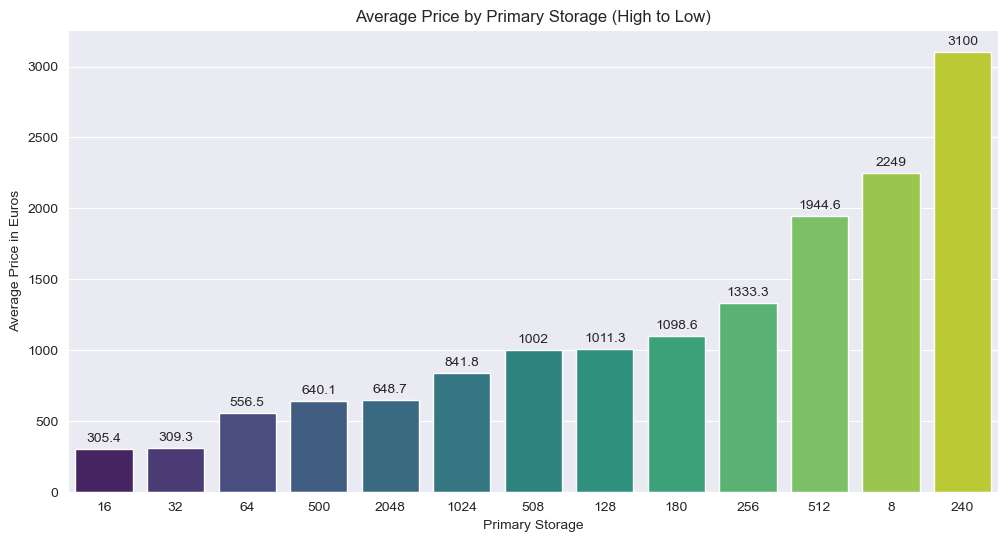

In [86]:
#  Distribution of Primary Storage offers the best value in terms of price? 

import matplotlib.pyplot as plt
import seaborn as sns


avg_price = df.groupby('PrimaryStorage')['Price_euros'].mean().round(1)
sorted_avg_price = avg_price.sort_values(ascending=True)


plt.figure(figsize=(12, 6))
a = sns.barplot(x=sorted_avg_price.index, y=sorted_avg_price.values, palette='viridis', order=sorted_avg_price.index)
a.bar_label(a.containers[0], label_type='edge', padding=3, fontsize=10)
plt.title('Average Price by Primary Storage (High to Low)')
plt.xlabel('Primary Storage')
plt.ylabel('Average Price in Euros')
plt.xticks(rotation=0)  
plt.show()


In [87]:
# Are laptops with RetinaDisplay more expensive than those without?


# Hypothesis Testing
from scipy.stats import ttest_ind

retina = df[df['RetinaDisplay'] == 'Yes']['Price_euros']
non_retina = df[df['RetinaDisplay'] == 'No']['Price_euros']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(retina, non_retina, equal_var=False)

print("T-Statistic:", round(t_stat, 3))
print("P-Value:", round(p_value, 4))


# Mean scores
retina_mean = retina.mean()
non_retina_mean = non_retina.mean()

print("Mean price for retina display laptop:", round(retina_mean, 2))
print("Mean price for non retina display laptop:", round(non_retina_mean, 2))


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Laptops with Retina Display have significantly different prices.")
    if retina_mean > non_retina_mean:
        print("retina display laptop tend to have a higher overall price.")
    else:
        print("non retina display laptop tend to have a higher overall price.")
else:
    print("Fail to reject the null hypothesis: No significant difference in price.")

T-Statistic: 3.569
P-Value: 0.0024
Mean price for retina display laptop: 1657.85
Mean price for non retina display laptop: 1127.9
Reject the null hypothesis: Laptops with Retina Display have significantly different prices.
retina display laptop tend to have a higher overall price.


In [88]:
# Which GPU companies dominate in high-end laptops?

high_end_laptops = df[df['Price_euros'] > df['Price_euros'].median()]
gpu_counts = high_end_laptops['GPU_company'].value_counts()
gpu_percentage = (gpu_counts / gpu_counts.sum()) * 100
gpu_summary = pd.DataFrame({'Count': gpu_counts,'Percentage': gpu_percentage.round(2)})
gpu_summary_sorted = gpu_summary.sort_values(by='Count', ascending=False)
print("GPU Companies Dominating in High-End Laptops:")
print(gpu_summary_sorted)


GPU Companies Dominating in High-End Laptops:
             Count  Percentage
GPU_company                   
Intel          326       51.34
Nvidia         275       43.31
AMD             34        5.35


In [89]:
#What is the distribution of CPU_company, and how does it affect price?

avg_price = df.groupby('CPU_company')['Price_euros'].mean().sort_values(ascending=False).round(2)
cpu_counts = df['CPU_company'].value_counts().sort_values(ascending=False)
cpu_percentage = (cpu_counts / cpu_counts.sum()) * 100
cpu_counts_summary = pd.DataFrame({'Count': cpu_counts,'Percentage': cpu_percentage.round(2)})


print("Distribution of CPU_company (Counts):")
print(cpu_counts_summary)
print("Average Price by CPU_company in euros:")
print(avg_price)


Distribution of CPU_company (Counts):
             Count  Percentage
CPU_company                   
Intel         1214       95.22
AMD             60        4.71
Samsung          1        0.08
Average Price by CPU_company in euros:
CPU_company
Intel      1163.73
Samsung     659.00
AMD         560.99
Name: Price_euros, dtype: float64


Regression Equation: Price =  32.65 × Inches + 644.43
R-squared: 0.004
p-value: 0.0174


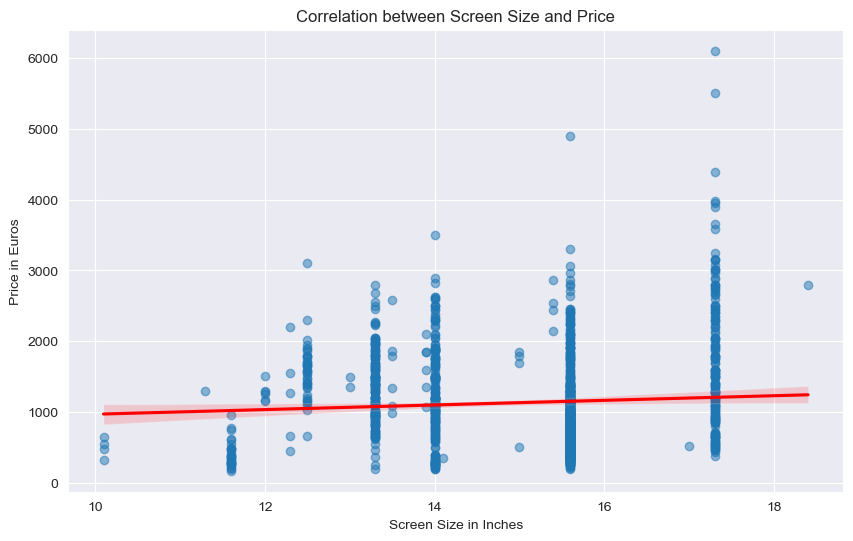

The correlation is weak - Laptop screen Inches does not explain much of the variation in Price.
The relationship between screen size and price is statistically significant — there is sufficient evidence to conclude the relationship is real.


In [94]:
# Is there a correlation between screen size in Inches and Price_euros?

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit the regression model
X = df['Inches']  
y = df['Price_euros']  

# Add constant for intercept
X_with_const = sm.add_constant(X)

# Fit the model 
model = sm.OLS(y, X_with_const).fit()

# Get the regression equation
slope = model.params[1]
intercept = model.params[0]
r_squared = model.rsquared
p_value = model.pvalues[1]  # p-value for the independent variable (Inches)

# Display the regression equation
print("Regression Equation: Price = ", round(slope, 2), "× Inches +", round(intercept, 2))

# Display R-squared value
print("R-squared:", round(r_squared, 3))

# Display p-value
print("p-value:", round(p_value, 4))

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Inches', y='Price_euros', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Correlation between Screen Size and Price')
plt.xlabel('Screen Size in Inches')
plt.ylabel('Price in Euros')
plt.grid(True)
plt.show()


if r_squared < 0.5:
    print("The correlation is weak - Laptop screen Inches does not explain much of the variation in Price.")
elif 0.5 <= r_squared < 0.6:
    print("The correlation is moderate — Laptop screen Inches explain a moderate amount of the variation in price.")
else:
    print("The correlation is strong - Laptop screen Inches explains a significant amount of the variation in Price.")


alpha = 0.05 

if p_value < 0.01:
    print('The relationship between screen size and price is highly significant — the relationship is very unlikely to be due to chance.')
elif 0.01 <= p_value < 0.05:
    print("The relationship between screen size and price is statistically significant — there is sufficient evidence to conclude the relationship is real.")
elif 0.05 <= p_value < 0.1:
    print("The relationship between screen size and price is marginally significant — there is weak evidence that the relationship is not due to chance.")
else:
    print("The relationship between screen size and price is not statistically significant — the relationship is likely due to random variation.")


Regression Equation: Price =  221.87 × Weight + 682.23
R-squared: 0.045
p-value: 0.0


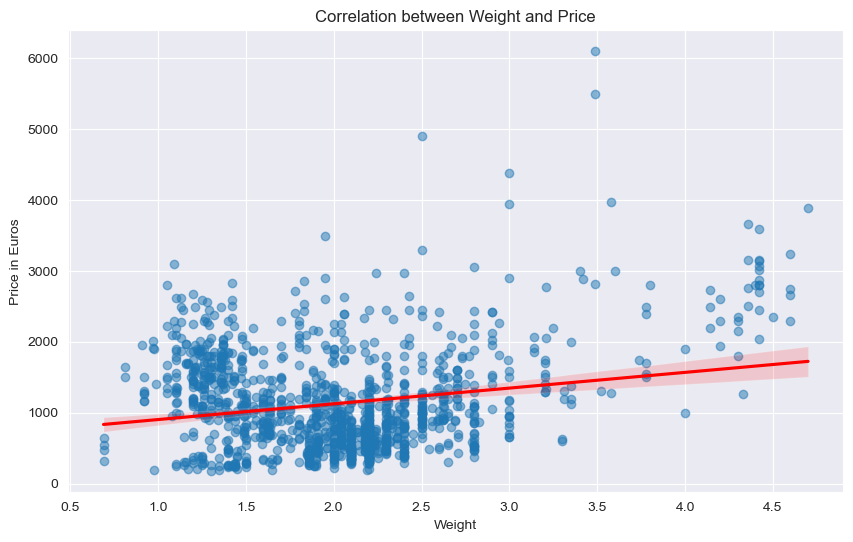

The correlation is weak - Weight does not explain much of the variation in Price.
The relationship between weight and price is highly significant — the relationship is very unlikely to be due to chance.


In [95]:
# Do heavier laptops (Weight) tend to cost more or less?

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Fit the regression model
X = df['Weight']  
y = df['Price_euros'] 

# Add constant for intercept
X_with_const = sm.add_constant(X)

# Fit the model 
model = sm.OLS(y, X_with_const).fit()

# Get the regression equation
slope = model.params[1]
intercept = model.params[0]
r_squared = model.rsquared
p_value = model.pvalues[1]  

# Display the regression equation
print("Regression Equation: Price = ", round(slope, 2), "× Weight +", round(intercept, 2))

# Display R-squared value
print("R-squared:", round(r_squared, 3))

# Display p-value
print("p-value:", round(p_value, 4))

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Weight', y='Price_euros', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Correlation between Weight and Price')
plt.xlabel('Weight')
plt.ylabel('Price in Euros')
plt.grid(True)
plt.show()


if r_squared < 0.5:
    print("The correlation is weak - Weight does not explain much of the variation in Price.")
elif 0.5 <= r_squared < 0.6:
    print("The correlation is moderate — Weight explains a moderate amount of the variation in price.")
else:
    print("The correlation is strong - Weight explains a significant amount of the variation in Price.")


alpha = 0.05  
if p_value < 0.01:
    print('The relationship between weight and price is highly significant — the relationship is very unlikely to be due to chance.')
elif 0.01 <= p_value < 0.05:
    print("The relationship between weight and price is statistically significant — there is sufficient evidence to conclude the relationship is real.")
elif 0.05 <= p_value < 0.1:
    print("The relationship between weight and price is marginally significant — there is weak evidence that the relationship is not due to chance.")
else:
    print("The relationship between weight and price is not statistically significant — the relationship is likely due to random variation.")


Regression Equation: Price =  596.44 × CPU_freq + -238.63
R-squared: 0.184
p-value: 0.0


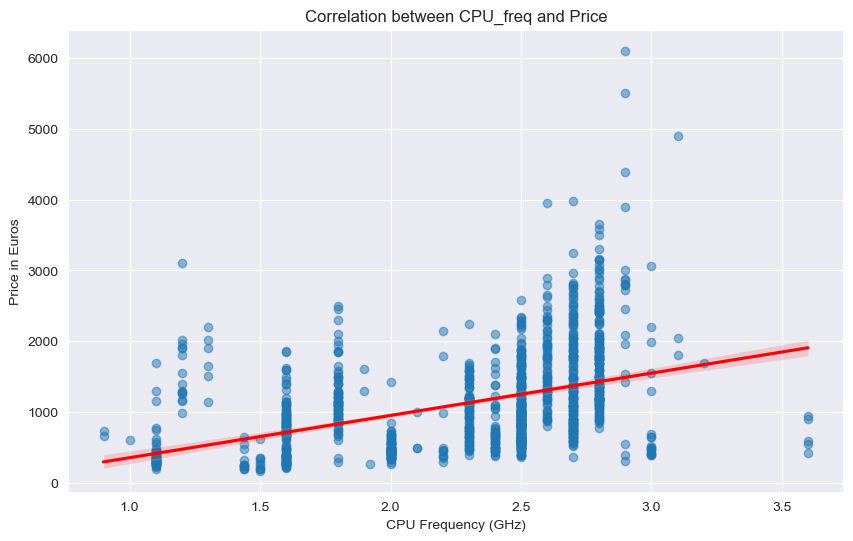

The correlation is weak - CPU_freq does not explain much of the variation in Price.
The relationship between CPU_freq and price is highly significant — the relationship is very unlikely to be due to chance.


In [96]:
# How does CPU_freq influence laptop price?

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Fit the regression model
X = df['CPU_freq']  # Independent variable
y = df['Price_euros']  # Dependent variable

# Add constant for intercept
X_with_const = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X_with_const).fit()

# Get the regression equation
slope = model.params[1]
intercept = model.params[0]
r_squared = model.rsquared
p_value = model.pvalues[1]  # p-value for the independent variable (CPU_freq)

# Display the regression equation
print("Regression Equation: Price = ", round(slope, 2), "× CPU_freq +", round(intercept, 2))

# Display R-squared value
print("R-squared:", round(r_squared, 3))

# Display p-value
print("p-value:", round(p_value, 4))

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='CPU_freq', y='Price_euros', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Correlation between CPU_freq and Price')
plt.xlabel('CPU Frequency (GHz)')
plt.ylabel('Price in Euros')
plt.grid(True)
plt.show()

# Evaluate if correlation is strong based on R-squared
if r_squared < 0.5:
    print("The correlation is weak - CPU_freq does not explain much of the variation in Price.")
elif 0.5 <= r_squared < 0.6:
    print("The correlation is moderate — CPU_freq explains a moderate amount of the variation in price.")
else:
    print("The correlation is strong - CPU_freq explains a significant amount of the variation in Price.")

# Hypothesis Test (Statistical Significance)
alpha = 0.05  # Significance level

if p_value < 0.01:
    print('The relationship between CPU_freq and price is highly significant — the relationship is very unlikely to be due to chance.')
elif 0.01 <= p_value < 0.05:
    print("The relationship between CPU_freq and price is statistically significant — there is sufficient evidence to conclude the relationship is real.")
elif 0.05 <= p_value < 0.1:
    print("The relationship between CPU_freq and price is marginally significant — there is weak evidence that the relationship is not due to chance.")
else:
    print("The relationship between CPU_freq and price is not statistically significant — the relationship is likely due to random variation.")


In [69]:
#How does RAM (Ram) and Primary Storage (PrimaryStorage) together affect price?
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit the regression model
X = df[['Ram', 'PrimaryStorage']]  
y = df['Price_euros']              

# Add constant for intercept
X_with_const = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X_with_const).fit()

# Get regression equation components
intercept = model.params['const']
slope_ram = model.params['Ram']
slope_storage = model.params['PrimaryStorage']
r_squared = model.rsquared

# Display the regression equation
print("Regression Equation: Price =",round(slope_ram, 2), "× RAM ",round(slope_storage, 2), "× PrimaryStorage +",round(intercept, 2))
print("R-squared:", round(r_squared, 3))

# Evaluate strength of relationship
if r_squared < 0.5:
    print("The correlation is weak — the independent variables (RAM and PrimaryStorage) do not explain much of the variation in Price.")
elif 0.5 <= r_squared < 0.6:
    print("The correlation is moderate — RAM and PrimaryStorage together explain a moderate amount of the variation in price.")
else:
    print("The correlation is strong — RAM and PrimaryStorage together explain a significant amount of the variation in price.")





Regression Equation: Price = 102.05 × RAM  -0.26 × PrimaryStorage + 389.65
R-squared: 0.567
The correlation is moderate — RAM and PrimaryStorage together explain a moderate amount of the variation in price.


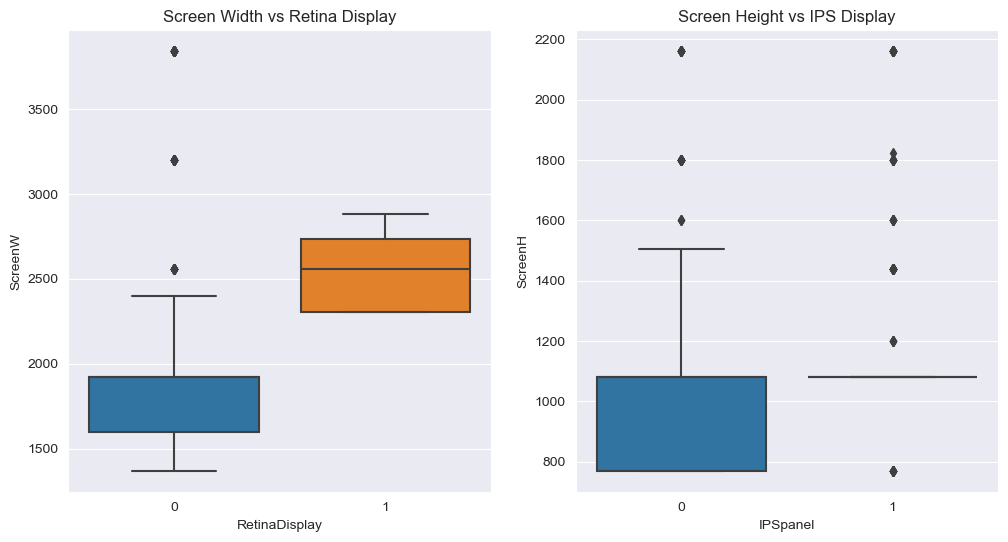

Screen Resolution Correlation for Retina Laptops: nan
Screen Resolution Correlation for IPS Laptops: nan
The correlation between Screen Width and Screen Height is not very high for both Retina and IPS displays.


In [70]:
# Do laptops with higher screen resolution (ScreenW, ScreenH) tend to have Retina and IPS displays?

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


retina_laptops = df[df['RetinaDisplay'] == 'Yes']
ips_laptops = df[df['IPSpanel'] == 'Yes']

# Create box plots for Screen Width and Screen Height vs Display Types
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='RetinaDisplay', y='ScreenW', data=df)
plt.title('Screen Width vs Retina Display')
plt.subplot(1, 2, 2)
sns.boxplot(x='IPSpanel', y='ScreenH', data=df)
plt.title('Screen Height vs IPS Display')

plt.show()

# Correlation between screen resolution (ScreenW, ScreenH) and binary display types
resolution_retina_corr = retina_laptops[['ScreenW', 'ScreenH']].corr().iloc[0, 1]
resolution_ips_corr = ips_laptops[['ScreenW', 'ScreenH']].corr().iloc[0, 1]



# Display correlation results
print("Screen Resolution Correlation for Retina Laptops:", round(resolution_retina_corr, 3))
print("Screen Resolution Correlation for IPS Laptops:", round(resolution_ips_corr, 3))


# Define the threshold for strong correlation
threshold = 0.95

# Check if the correlation for both Retina and IPS displays is above the threshold
if resolution_retina_corr > threshold and resolution_ips_corr > threshold:
    print("Both Retina and IPS displays show a very high correlation between Screen Width and Screen Height.")
else:
    print("The correlation between Screen Width and Screen Height is not very high for both Retina and IPS displays.")


In [59]:
# Which combinations of OS and TypeName appear most in high-priced laptops?


# Filter high-priced laptops (greater than median price)
high_end_laptops = df[df['Price_euros'] > df['Price_euros'].median()]

# Group by OS and TypeName, then calculate average price
grouped = high_end_laptops.groupby(['OS', 'TypeName'])['Price_euros'].mean().round(2).reset_index()

# Sort by average price in descending order
top_categories = grouped.sort_values(by='Price_euros', ascending=False)

# Print results
print("Combinations of OS and TypeName that appear most in high-priced laptops:")
print(top_categories)


Combinations of OS and TypeName that appear most in high-priced laptops:
              OS            TypeName  Price_euros
19     Windows 7         Workstation      2534.55
13    Windows 10         Workstation      2183.52
15     Windows 7  2 in 1 Convertible      2050.38
9     Windows 10              Gaming      1860.08
20         macOS           Ultrabook      1820.52
14  Windows 10 S           Ultrabook      1736.97
18     Windows 7           Ultrabook      1715.88
8     Windows 10  2 in 1 Convertible      1678.94
1      Chrome OS           Ultrabook      1677.67
12    Windows 10           Ultrabook      1657.96
10    Windows 10             Netbook      1619.80
16     Windows 7             Netbook      1599.00
17     Windows 7            Notebook      1535.56
11    Windows 10            Notebook      1365.33
4       Mac OS X           Ultrabook      1306.28
6          No OS            Notebook      1299.47
0      Chrome OS  2 in 1 Convertible      1159.00
5          No OS           

In [60]:
#Do touchscreen laptops cost more?

#hypothesis test

# Split the price data based on touchscreen feature
touchscreen_prices = df[df['Touchscreen'] == 'Yes']['Price_euros']
non_touchscreen_prices = df[df['Touchscreen'] == 'No']['Price_euros']


t_stat, p_value = ttest_ind(touchscreen_prices, non_touchscreen_prices, equal_var=False)

print("T-statistic:", round(t_stat, 3))
print("P-value:", round(p_value, 4))


# Mean scores
touchscreen_prices_mean = touchscreen_prices.mean()
non_touchscreen_prices_mean = non_touchscreen_prices.mean()

print("Mean price for touchscreen laptop:", round(touchscreen_prices_mean, 2))
print("Mean price for non touchscreen laptop:", round(non_touchscreen_prices_mean, 2))


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Touchscreen laptops have significantly different prices.")
    if touchscreen_prices_mean > non_touchscreen_prices_mean:
        print("touchscreen laptop tend to have a higher overall price.")
    else:
        print("non touchscreen laptop tend to have a higher overall price.")    
else:
    print("Fail to reject the null hypothesis: No significant difference in price.")


T-statistic: 6.149
P-value: 0.0
Mean price for touchscreen laptop: 1453.12
Mean price for non touchscreen laptop: 1079.94
Reject the null hypothesis: Touchscreen laptops have significantly different prices.
touchscreen laptop tend to have a higher overall price.


In [61]:
# Which combinations of RAM and Storage give the highest value per euro?
# value_score = (Ram + PrimaryStorage) / Price_euros

df['value_score'] = (df['Ram'] + df['PrimaryStorage']) / df['Price_euros']
a = df.groupby(['Ram', 'PrimaryStorage'])['value_score'].mean().reset_index()
a = a.sort_values(by='value_score', ascending=False).round(2)

print("Average value score for combinations of RAM and Primary Storage:")
print(a)

Average value score for combinations of RAM and Primary Storage:
    Ram  PrimaryStorage  value_score
27    8            2048         3.81
17    6            2048         3.23
32   12            2048         2.37
12    4            1024         2.24
37   16            2048         2.08
16    6            1024         1.89
26    8            1024         1.43
3     2             500         1.32
31   12            1024         1.17
10    4             500         1.02
36   16            1024         0.65
11    4             508         0.51
24    8             500         0.49
30   12             512         0.42
15    6             256         0.41
9     4             256         0.39
25    8             512         0.33
2     2              64         0.29
35   16             512         0.29
42   32            1024         0.27
43   64            1024         0.27
23    8             256         0.23
7     4             128         0.23
38   24             256         0.22
8     4   

In [62]:
# Machine Learning

# Predicting the app rating based on the features in the dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Label Encoding categorical features
label_encoder = LabelEncoder()

df['Company'] = label_encoder.fit_transform(df['Company'])
df['TypeName'] = label_encoder.fit_transform(df['TypeName'])
df['OS'] = label_encoder.fit_transform(df['OS'])
df['Touchscreen'] = label_encoder.fit_transform(df['Touchscreen'])
df['IPSpanel'] = label_encoder.fit_transform(df['IPSpanel'])
df['RetinaDisplay'] = label_encoder.fit_transform(df['RetinaDisplay'])
df['CPU_company'] = label_encoder.fit_transform(df['CPU_company'])
df['PrimaryStorageType'] = label_encoder.fit_transform(df['PrimaryStorageType'])
df['SecondaryStorageType'] = label_encoder.fit_transform(df['SecondaryStorageType'])
df['GPU_company'] = label_encoder.fit_transform(df['GPU_company'])

# Define features and target variable
X = df[['Company', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight', 'ScreenW', 'ScreenH',
            'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq',
            'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company']]
y = df['Price_euros']

# Handle missing values
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [63]:
#Random Forest Model (regression model)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
    
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:',  mse)
print('R-squared:', r2)

Mean Squared Error: 78798.24166806889
R-squared: 0.8470537166870762


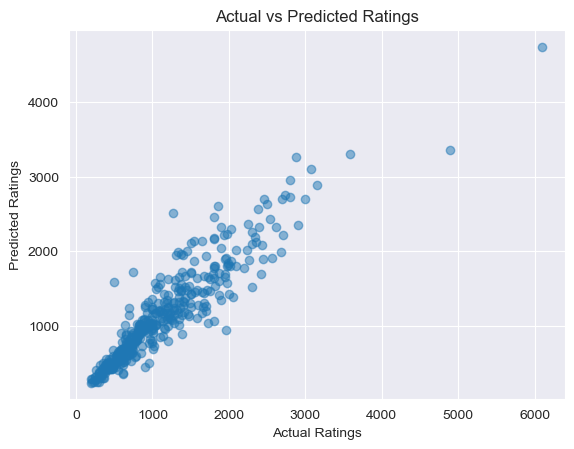

In [64]:
#Actual vs predicted chart

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.grid(True)
plt.show()

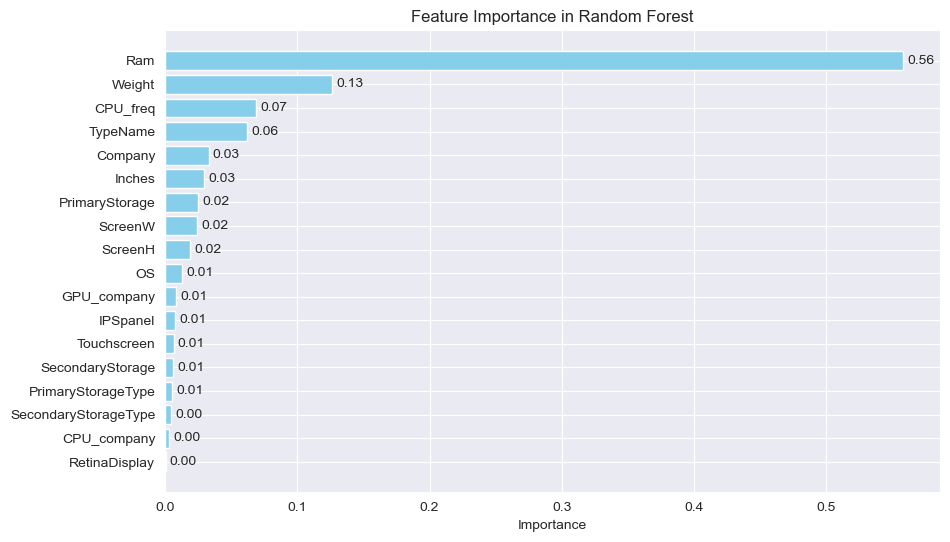

In [65]:
#Feature Importance in Random Forest

import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
importances = model.feature_importances_
features = X.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')
ax.bar_label(bars, label_type='edge', padding=3, fontsize=10, fmt='%.2f')
ax.set_xlabel("Importance")
ax.set_title("Feature Importance in Random Forest")
ax.invert_yaxis()

plt.show()

In [66]:
#classification modeel (random forest)
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import f1_score

# Create balanced bins using quantiles (equal frequency binning)
df['Price_eurosCategory'] = pd.qcut(df['Price_euros'], q=3, labels=['low', 'medium', 'high'])

# Features and target
X = df[['Company', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight', 'ScreenW', 'ScreenH',
        'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq',
        'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
        'SecondaryStorageType', 'GPU_company']]
y = df['Price_eurosCategory']

# Label Encoding for categorical features
label_cols = ['Company', 'TypeName', 'OS', 'Touchscreen', 'IPSpanel', 'RetinaDisplay',
              'CPU_company', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company']

X['Company'] = label_encoder.fit_transform(X['Company'])
X['TypeName'] = label_encoder.fit_transform(X['TypeName'])
X['OS'] = label_encoder.fit_transform(X['OS'])
X['Touchscreen'] = label_encoder.fit_transform(X['Touchscreen'])
X['RetinaDisplay'] = label_encoder.fit_transform(X['RetinaDisplay'])
X['CPU_company'] = label_encoder.fit_transform(X['CPU_company'])
X['PrimaryStorageType'] = label_encoder.fit_transform(X['PrimaryStorageType'])
X['SecondaryStorageType'] = label_encoder.fit_transform(X['SecondaryStorageType'])
X['GPU_company'] = label_encoder.fit_transform(X['GPU_company'])

# Encode the target variable
y = LabelEncoder().fit_transform(y)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Random Forest with class_weight
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_train, y_train)

# Predict
y_pred_class = rf_clf.predict(X_test)

# Evaluation

unique, counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_class) * 100))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_class))
print("F1 Score (Macro):", f1_score(y_test, y_pred_class, average='macro'))

print("Classification Report:")
print(classification_report(y_test, y_pred_class))




Class distribution: {0: 424, 1: 425, 2: 426}
Confusion Matrix:
[[114   0  13]
 [  0 108  20]
 [ 24  11  93]]
Accuracy: 82.25%
Balanced Accuracy: 0.8226500984251969
F1 Score (Macro): 0.8223849167276671
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       127
           1       0.91      0.84      0.87       128
           2       0.74      0.73      0.73       128

    accuracy                           0.82       383
   macro avg       0.82      0.82      0.82       383
weighted avg       0.82      0.82      0.82       383

